In [15]:
# Dataset - 3 : Decision Tree Heart Attack Analysis and Prediction Dataset

# 1: Import Libraries
# Explanation:
# This cell imports the essential Python libraries needed for data manipulation, model building,
# evaluation, and visualization, consistent with the previous projects.

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis (like tables)
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # The Decision Tree model and its visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # To evaluate the model's performance
import matplotlib.pyplot as plt  # For creating basic plots and visualizations
import seaborn as sns  # For creating more advanced and statistical visualizations
from sklearn.model_selection import GridSearchCV  # For automatically finding the best model parameters

In [16]:
# 2: Load the Dataset
# Explanation:
# This cell loads the heart attack dataset from the heart.csv file into a pandas DataFrame.
# It then displays the first few rows, provides information about the data types and non-null values
# of each column, and checks for any missing values in the dataset.

# Load the Heart Attack Analysis & Prediction Dataset
try:
    data_heart = pd.read_csv('heart.csv')
except FileNotFoundError:
    print("Error: heart.csv not found. Make sure the file is in the correct location.")
    exit()

# Display the first few rows to understand the data
print("First 5 rows of Heart dataset:")
print(data_heart.head())

# Get some basic information about the dataset
print("\nInformation about the Heart dataset:")
print(data_heart.info())

# Check for missing values
print("\nMissing values in the Heart dataset:")
print(data_heart.isnull().sum())

First 5 rows of Heart dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Information about the Heart dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Cou

In [17]:
# 3: Separate Features and Target, and Split Data

# Explanation:
# In this cell, we separate the features (all columns except the target) from the target
# variable ('output', where 0 typically represents no heart attack and 1 represents a heart attack).
# We then split the data into training and testing sets, allocating 30% for testing and using a
# random_state for reproducibility of the split.

# Separate features (X) and target (y)
X_heart = data_heart.drop('HeartDisease', axis=1)
y_heart = data_heart['HeartDisease']

# Identify categorical columns
categorical_cols_heart = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Handle 'Sex' using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_heart['Sex'] = le.fit_transform(X_heart['Sex'])

# Handle other categorical columns using One-Hot Encoding
X_heart = pd.get_dummies(X_heart, columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Split the data into training and testing sets
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.3, random_state=42
)

print("\nShape of X_train_heart (training features):", X_train_heart.shape)
print("\nShape of X_test_heart (testing features):", X_test_heart.shape)
print("\nShape of y_train_heart (training target):", y_train_heart.shape)
print("\nShape of y_test_heart (testing target):", y_test_heart.shape)


Shape of X_train_heart (training features): (642, 15)

Shape of X_test_heart (testing features): (276, 15)

Shape of y_train_heart (training target): (642,)

Shape of y_test_heart (testing target): (276,)


In [18]:
# 4: Initialize and Train the Decision Tree Model
# Explanation:
# This cell creates an instance of the DecisionTreeClassifier with initial hyperparameters
# (criterion, max_depth, min_samples_leaf, random_state) and trains it using the heart attack training
# features (X_train_heart) and target labels (y_train_heart).

# Initialize the Decision Tree model
dt_model_heart = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)

# Check the data types of X_train_heart
print("\nData types of X_train_heart before fitting:")
print(X_train_heart.dtypes)

# Train the Decision Tree model on the training data
dt_model_heart.fit(X_train_heart, y_train_heart)

print("\nDecision Tree model trained for Heart Attack Prediction.")


Data types of X_train_heart before fitting:
Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_Y        bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object

Decision Tree model trained for Heart Attack Prediction.



Accuracy of the Decision Tree model (Heart): 0.7971

Classification Report (Heart):
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       112
           1       0.88      0.77      0.82       164

    accuracy                           0.80       276
   macro avg       0.79      0.80      0.79       276
weighted avg       0.81      0.80      0.80       276


Confusion Matrix (Heart):


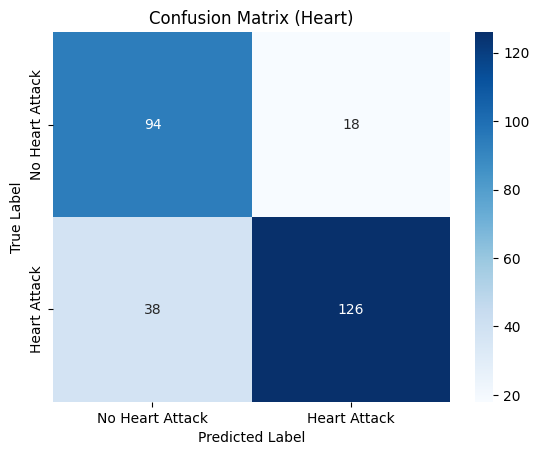

In [19]:
# 5: Make Predictions and Evaluate the Model
# Explanation:
# This cell uses the trained heart attack prediction model (dt_model_heart) to make predictions
# on the unseen test data (X_test_heart). It then evaluates the model's performance using accuracy,
# a classification report (precision, recall, F1-score), and a confusion matrix visualized as a heatmap.
# The class labels in the confusion matrix are explicitly set to 'No Heart Attack' and 'Heart Attack'.

# Make predictions on the test data
y_pred_heart = dt_model_heart.predict(X_test_heart)

# Evaluate the model
accuracy_heart = accuracy_score(y_test_heart, y_pred_heart)
print(f"\nAccuracy of the Decision Tree model (Heart): {accuracy_heart:.4f}")

print("\nClassification Report (Heart):")
print(classification_report(y_test_heart, y_pred_heart))

print("\nConfusion Matrix (Heart):")
cm_heart = confusion_matrix(y_test_heart, y_pred_heart)
sns.heatmap(cm_heart, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Heart)')
plt.show()

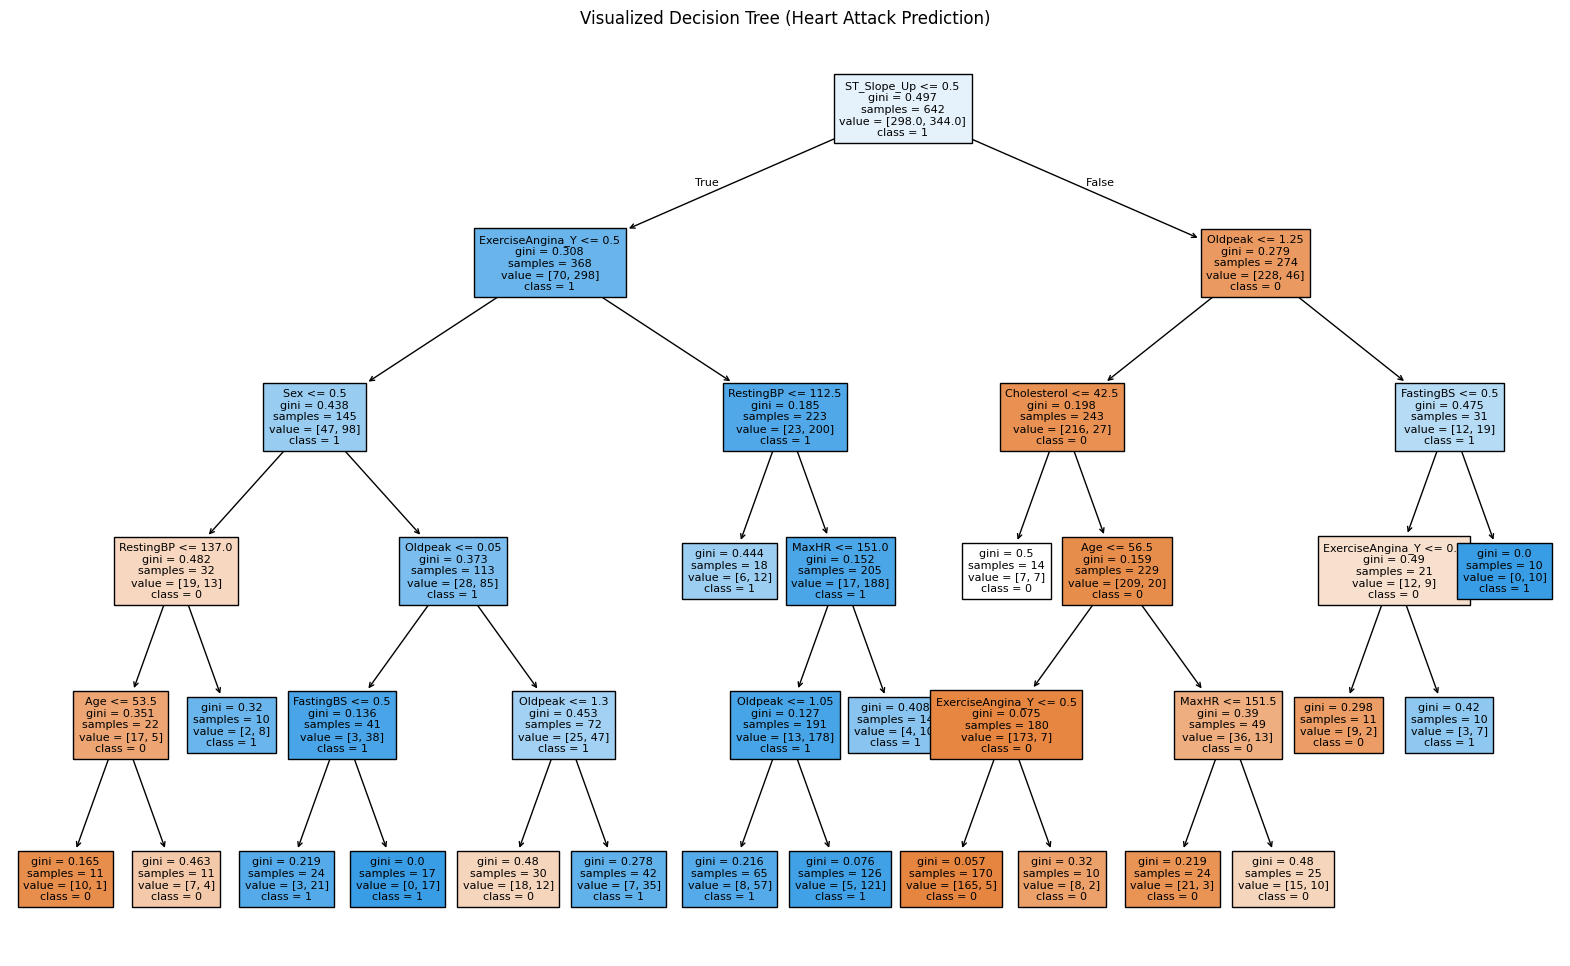

In [20]:
# 6: Visualize the Decision Tree (Heart)
# Explanation:
# This cell visualizes the learned Decision Tree for heart attack prediction using plot_tree.
# We ensure that the class_names are a list of strings based on the unique values in the y_heart target
# variable. The resulting tree's size will depend on the complexity learned from the data.

# Visualize the Decision Tree (Heart) - may be moderately sized
import numpy as np

plt.figure(figsize=(20, 12))
plot_tree(dt_model_heart, filled=True, feature_names=X_heart.columns,
          class_names=[str(c) for c in np.unique(y_heart)], fontsize=8) # Adjust fontsize if needed
plt.title("Visualized Decision Tree (Heart Attack Prediction)")
plt.show()

In [21]:
# 7: Hyperparameter Tuning
# Explanation:
# This cell performs hyperparameter tuning for the heart attack prediction model using
# GridSearchCV. It defines a range of hyperparameters to test (criterion, max_depth, min_samples_leaf),
# performs cross-validation to find the best combination, and then evaluates the performance of the
# best model on the test set.

# --- Hyperparameter Tuning ---
param_grid_heart = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search_heart = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_heart, cv=5)
grid_search_heart.fit(X_train_heart, y_train_heart)

print("\nBest Hyperparameters (Heart):", grid_search_heart.best_params_)

best_dt_heart = grid_search_heart.best_estimator_
y_pred_best_heart = best_dt_heart.predict(X_test_heart)
accuracy_best_heart = accuracy_score(y_test_heart, y_pred_best_heart)
print(f"\nAccuracy with Best Hyperparameters (Heart): {accuracy_best_heart:.4f}")


Best Hyperparameters (Heart): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 20}

Accuracy with Best Hyperparameters (Heart): 0.7935
